In [1]:
import pandas as pd

titanic_df = pd.read_csv('https://raw.githubusercontent.com/fpinell/mlsa/refs/heads/main/data/titanic/train_mlsa.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
1,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
2,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
3,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
4,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S


[[<Axes: title={'center': 'Pclass'}> <Axes: title={'center': 'Age'}>]
 [<Axes: title={'center': 'SibSp'}> <Axes: title={'center': 'Parch'}>]
 [<Axes: title={'center': 'Fare'}> <Axes: >]]
   Pclass     Sex   Age  SibSp  Parch  Ticket     Fare Embarked
0       3    male  33.0      0      0    7540   8.6542        S
1       3    male  42.0      0      0  315088   8.6625        S
2       3    male   2.0      3      1  349909  21.0750        S
3       2  female  24.0      0      0  248733  13.0000        S
4       3    male  21.0      0      0    8475   8.4333        S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    791 non-null    int64  
 1   Sex       791 non-null    object 
 2   Age       634 non-null    float64
 3   SibSp     791 non-null    int64  
 4   Parch     791 non-null    int64  
 5   Ticket    791 non-null    object 
 6   Fare    

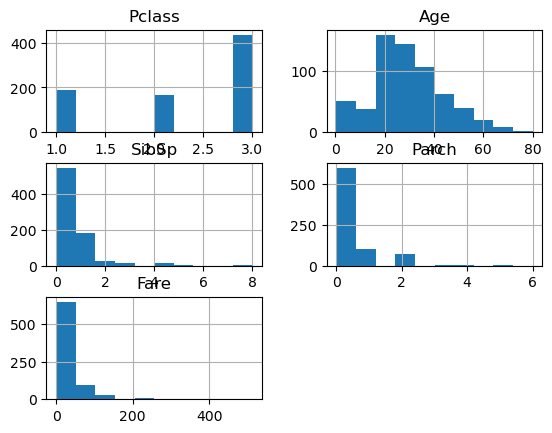

In [2]:
titanic_relevant_df = titanic_df.drop(columns = {"Name", "PassengerId", "Cabin", "Survived"})
print(titanic_relevant_df.hist())
print(titanic_relevant_df.head())
print(titanic_relevant_df.info())

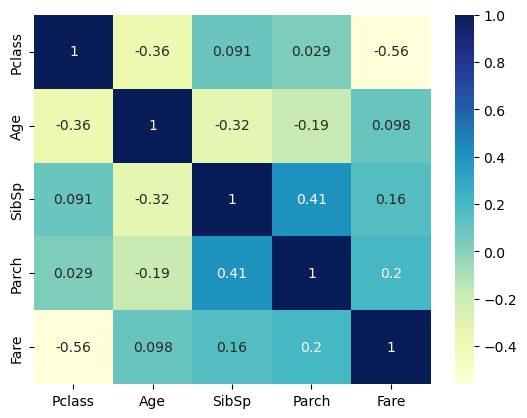

In [3]:
import seaborn as sns
correlation_matrix = titanic_relevant_df.corr('pearson', numeric_only=True)
_ = sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu")

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

cat_columns = ["Pclass", "Embarked"]
num_columns = ["Age", "SibSp", "Parch", "Fare"]

cat_pipeline = Pipeline(
    [
        ("cat_encoder", OneHotEncoder()),
    ]
)

#Inputer used for the age, missing in 160 entries
num_pipeline = Pipeline(
    [
        ("num_imputer", SimpleImputer()),
        ("num_scaler", RobustScaler()),
    ]
)

df_pipeline = ColumnTransformer (
    [
        ("num", num_pipeline, num_columns),
        ("cat", cat_pipeline, cat_columns),
    ]
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = titanic_df.drop("Survived", axis=1)  # Features
y = titanic_df["Survived"]  # Target

tree_pipeline = Pipeline(
    steps = [
        ("prepocessor", df_pipeline),
        ("classifier", DecisionTreeClassifier(random_state = 19))
    ]
)

scores = cross_val_score(tree_pipeline, X, y, cv=10, scoring='accuracy')
tree_pipeline.fit(X, y)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Embarked'])])),
                ('classifier', DecisionTreeClassifier(random_state=19))])

In [6]:
print(f"Cross-Validation Scores: {scores}")
print(f"Accuracy: {scores.mean():.4f}")

Cross-Validation Scores: [0.625      0.64556962 0.5443038  0.63291139 0.65822785 0.65822785
 0.73417722 0.74683544 0.69620253 0.67088608]
Accuracy: 0.6612


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Replace the DecisionTreeClassifier with RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ("preprocessor", df_pipeline),
    ("classifier", RandomForestClassifier(random_state=19))
])

# Cross-validate and fit
scores = cross_val_score(random_forest_pipeline, X, y, cv=5, scoring='accuracy')
random_forest_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=19))])

In [8]:
print(f"Cross-Validation Scores: {scores}")
print(f"Accuracy: {scores.mean():.4f}")

Cross-Validation Scores: [0.69811321 0.70886076 0.74683544 0.80379747 0.73417722]
Accuracy: 0.7384
